In [12]:
import tensorflow.keras as keras
import numpy as np
import importlib

import kaggle_functions as kaggle
import model12_autoencoder
importlib.reload(kaggle); 
importlib.reload(model12_autoencoder);
from model12_autoencoder import Model, model_number

### Create datasets

In [3]:
train_dataset, valid_dataset, valid_labels = kaggle.load_train_as_dataset()

batch_size = 32
train_dataset_augmented, epoch_length = kaggle.augment_dataset(train_dataset, batch_size)

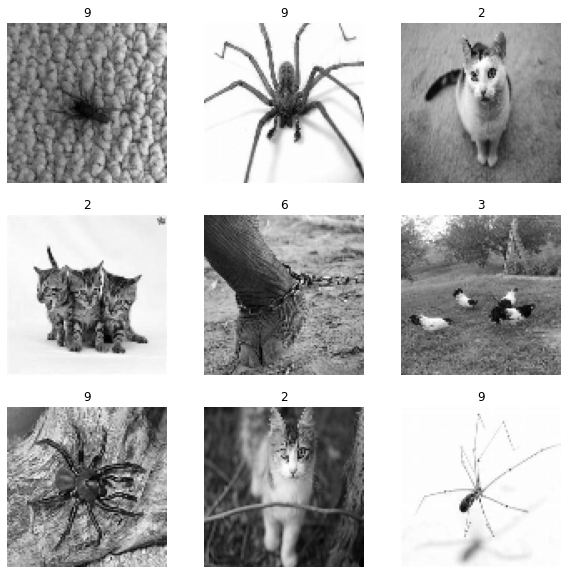

In [6]:
kaggle.show_images(train_dataset.batch(32), 9)

### Train new model

In [13]:
model = Model().build(None)
model.summary()

Model: "stacked_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 models/model12/Autoencoder_1/0  (None, 96, 96, 1)   12586241    ['input_5[0][0]']                
  (Functional)                                                                                    
                                                                                                  
 models/model12/Autoencoder_1/1  (None, 96, 96, 1)   12586241    ['input_5[0][0]']                
  (Functional)                                                                                    
                                                                                      

In [14]:
predictions = model.predict(valid_dataset)
print(predictions.shape)

(2378, 4)


In [43]:
mean = np.mean(predictions, axis=0)
var = np.var(predictions, axis=0)
corrected_pred = (predictions - mean) / var
final_pred = np.argmax(corrected_pred, axis=1)
kaggle.print_accuracy(valid_labels, final_pred)


Accuracy: 0.0446


In [4]:
# Fit model
# See {model}.py for specific training instructions, like epochs or valid_patience
model_name = 'Stacking_1'

model, history = kaggle.train_model(
    Model().build(None), train_dataset_augmented, valid_dataset, 
    epochs=25, valid_patience=5, epoch_length=epoch_length)

Epoch 1/25
298/298 [==============================] - 233s 713ms/step - loss: 5.7618 - accuracy: 0.2125 - val_loss: 3.2761 - val_accuracy: 0.6245 - lr: 1.0000e-05
Epoch 2/25
298/298 [==============================] - 190s 638ms/step - loss: 4.6199 - accuracy: 0.3433 - val_loss: 2.7135 - val_accuracy: 0.7868 - lr: 1.0000e-05
Epoch 3/25
298/298 [==============================] - 192s 643ms/step - loss: 4.1574 - accuracy: 0.4263 - val_loss: 2.5858 - val_accuracy: 0.8335 - lr: 1.0000e-05
Epoch 4/25
298/298 [==============================] - 163s 545ms/step - loss: 3.8257 - accuracy: 0.5031 - val_loss: 2.5535 - val_accuracy: 0.8457 - lr: 1.0000e-05
Epoch 5/25
298/298 [==============================] - 154s 518ms/step - loss: 3.5942 - accuracy: 0.5508 - val_loss: 2.5449 - val_accuracy: 0.8511 - lr: 1.0000e-05
Epoch 6/25
298/298 [==============================] - 154s 518ms/step - loss: 3.5057 - accuracy: 0.5678 - val_loss: 2.5533 - val_accuracy: 0.8520 - lr: 1.0000e-05
Epoch 7/25
298/298 [==

In [16]:
# Save model
model.save(f'models/{model_number}/{model_name}')

# Plot model statistics during training
kaggle.plot_model_history(history, [['accuracy', 'val_accuracy'], ['loss', 'val_loss']])

INFO:tensorflow:Assets written to: models/model10/WideResNet_6\assets


C:\Users\Guillaume\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\Guillaume\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [3]:
model = keras.models.load_model(f'models/{model_number}/WideResNet_2_73')

### Fine-tune

In [6]:
# Fine-tune model
fine_model, history = kaggle.fine_tune_model(
    model,
    train_dataset.batch(32), valid_dataset, 
    epochs=4, epoch_length=epoch_length, learning_rate=1E-5)

C:\Users\Guillaume\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/4
298/298 [==============================] - 209s 672ms/step - loss: 2.2565 - accuracy: 0.9287 - val_loss: 2.6015 - val_accuracy: 0.8709
Epoch 2/4
298/298 [==============================] - 191s 642ms/step - loss: 2.1849 - accuracy: 0.9473 - val_loss: 2.6106 - val_accuracy: 0.8726
Epoch 3/4
298/298 [==============================] - 194s 652ms/step - loss: 2.1785 - accuracy: 0.9544 - val_loss: 2.6267 - val_accuracy: 0.8726
Epoch 4/4
298/298 [==============================] - 183s 615ms/step - loss: 2.1470 - accuracy: 0.9620 - val_loss: 2.6356 - val_accuracy: 0.8747


In [ ]:
# Save fine-tuned model
fine_model_name = 'Stacking_1'
fine_model.save(f'models/{model_number}/{fine_model_name}')

### Evaluate

In [ ]:
model_name = ''
model = keras.models.load_model(f'models/{model_number}/{model_name}')
test_pred = np.argmax(model.predict(valid_dataset), axis=1)

kaggle.print_accuracy(valid_labels, test_pred)
kaggle.plot_confusion_matrix(valid_labels, test_pred)

### Generate test predictions

In [ ]:
model_name = 'WideResNet_3'
kaggle.generate_test_pred_filepath(f'models/{model_number}/{model_name}')

In [11]:
model_name = 'Stacking_0'
kaggle.generate_test_pred(model, f'models/{model_number}/{model_name}_test_pred.csv')

### Hypertune models

In [ ]:
tuner = kaggle.hypertune_model(
    Model(), train_dataset.batch(32).cache(), valid_dataset, 
    model_number, 'hypertuner2021-12-03', trials=4, 
    epochs=11, valid_patience=3, epoch_length=epoch_length)

In [7]:
tuner = kaggle.load_hypertuner(Model(), model_number, 'hypertuner2021-12-03')

INFO:tensorflow:Reloading Oracle from existing project models/model11\hypertuner2021-12-03\oracle.json
INFO:tensorflow:Reloading Tuner from models/model11\hypertuner2021-12-03\tuner0.json
Results summary
Results in models/model11\hypertuner2021-12-03
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dropout: 0.3
l2_reg: 0.001
Score: 0.8767872452735901
Trial summary
Hyperparameters:
dropout: 0.3
l2_reg: 0.0001
Score: 0.8738435506820679
Trial summary
Hyperparameters:
dropout: 0.6
l2_reg: 0.001
Score: 0.8717409372329712
Trial summary
Hyperparameters:
dropout: 0.6
l2_reg: 0.0001
Score: 0.8708999156951904


In [10]:
model = tuner.get_best_models(1)[0]